In [10]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip -o "/content/drive/MyDrive/mldataset/archive (1).zip" -d /content/drive/MyDrive/cats_dogs_images


Archive:  /content/drive/MyDrive/mldataset/archive (1).zip


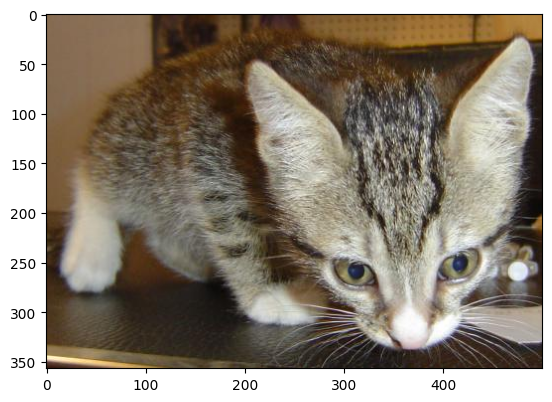

In [4]:
#load cat and dogs images from directory
img_dir = '/content/drive/My Drive/cats_dogs_images/PetImages'
cat_images = os.listdir(img_dir + '/Cat')
dog_images = os.listdir(img_dir + '/Dog')

#load a sample image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_dir + '/Cat/300.jpg')
plt.imshow(img)

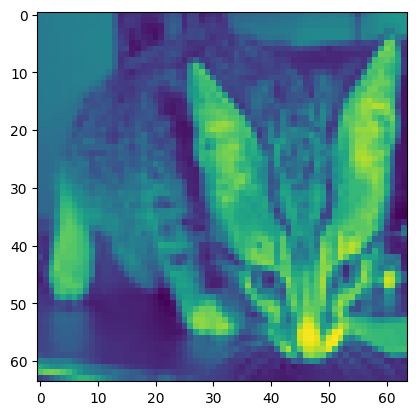

In [7]:
img_size = (64, 64)
img_path = os.path.join(img_dir, 'Cat', '300.jpg')
img = Image.open(img_path).convert("L")
img = img.resize(img_size)
plt.imshow(img)

In [8]:
#load cat and dog images into a dataframe for training as X and y
def load_images_to_df(base_dir, img_size=(64, 64)):
    data = []
    labels = []

    for label, category in enumerate(["Cat", "Dog"]):
        folder = os.path.join(base_dir, category)

        for file in os.listdir(folder):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(folder, file)

                img = Image.open(img_path).convert("L")
                img = img.resize(img_size)

                img_array = np.array(img).flatten()
                data.append(img_array)
                labels.append(category)

    df = pd.DataFrame(data)
    df["label"] = labels
    return df

In [9]:
df = load_images_to_df(img_dir)

print(df.shape)
df.head()

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


(24998, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,25,34,39,46,54,59,65,65,63,64,...,159,164,169,175,169,171,168,154,136,Cat
1,136,154,147,117,134,166,164,165,166,167,...,175,175,177,175,173,171,169,165,163,Cat
2,166,165,164,166,166,166,166,166,166,166,...,18,6,1,22,52,58,60,61,59,Cat
3,9,29,61,34,27,31,60,59,44,18,...,26,25,27,36,49,55,55,54,52,Cat
4,15,10,3,4,7,10,8,3,2,6,...,12,13,15,16,17,14,15,13,15,Cat


In [11]:
# encode the labels
df['label_binary'] = df['label'].map({'Cat': 0, 'Dog': 1})
df

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,label,label_binary
0,25,34,39,46,54,59,65,65,63,64,...,164,169,175,169,171,168,154,136,Cat,0
1,136,154,147,117,134,166,164,165,166,167,...,175,177,175,173,171,169,165,163,Cat,0
2,166,165,164,166,166,166,166,166,166,166,...,6,1,22,52,58,60,61,59,Cat,0
3,9,29,61,34,27,31,60,59,44,18,...,25,27,36,49,55,55,54,52,Cat,0
4,15,10,3,4,7,10,8,3,2,6,...,13,15,16,17,14,15,13,15,Cat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,248,248,248,248,248,248,248,248,248,248,...,250,250,250,250,250,250,250,250,Dog,1
24994,66,66,71,67,128,162,138,145,151,119,...,115,117,107,107,102,98,88,94,Dog,1
24995,122,102,75,83,70,79,119,112,120,90,...,134,131,124,118,110,111,101,103,Dog,1
24996,194,176,181,177,172,167,162,159,158,135,...,145,144,146,142,145,144,140,142,Dog,1


In [14]:
# split the data into train and val and test
X, y = df.drop(['label', 'label_binary'], axis=1), df['label_binary']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(14998, 4096) (5000, 4096) (5000, 4096)
(14998,) (5000,) (5000,)


In [ ]:
# train an XGBOOST model for classification
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",   # important for loss plotting
    use_label_encoder=False
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False
)



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:51:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


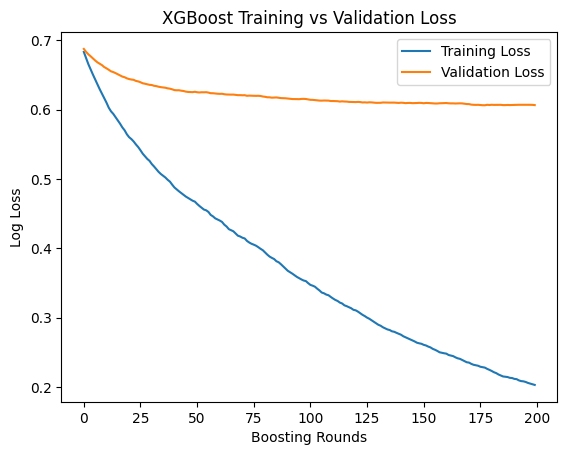

In [15]:
results = xgb_model.evals_result()

train_loss = results["validation_0"]["logloss"]
val_loss = results["validation_1"]["logloss"]

plt.figure()
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Boosting Rounds")
plt.ylabel("Log Loss")
plt.legend()
plt.title("XGBoost Training vs Validation Loss")
plt.show()

In [16]:
# predict the labels on val set
y_val_pred = xgb_model.predict(X_val)

# evaluate the model
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation Classification Report:\n{classification_report(y_val, y_val_pred)}")

Validation Accuracy: 0.6726
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2515
           1       0.67      0.67      0.67      2485

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000

